In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.easter import easter
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
1,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
3,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
4,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500


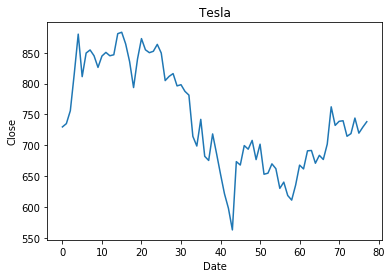

In [3]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [5]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data = data[['Date', 'Close']]
data = data.rename(columns = {'Date' : 'ds', 'Close' : 'y'})
data.head()

,ds,y
0,2021-01-04,729.770020
1,2021-01-05,735.109985
2,2021-01-06,755.979980
3,2021-01-07,816.039978
4,2021-01-08,880.020020


In [6]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/lokesh/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/home/lokesh/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/lokesh/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates

,ds,yhat,yhat_lower,yhat_upper
438,2022-04-22,1467.116325,-209.634178,3208.554604
439,2022-04-23,194.144853,-1480.888019,1928.731631
440,2022-04-24,196.195095,-1470.333461,1950.886954
441,2022-04-25,1467.658005,-213.203476,3206.574547
442,2022-04-26,1483.925685,-181.445113,3229.665804


/home/lokesh/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lokesh/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


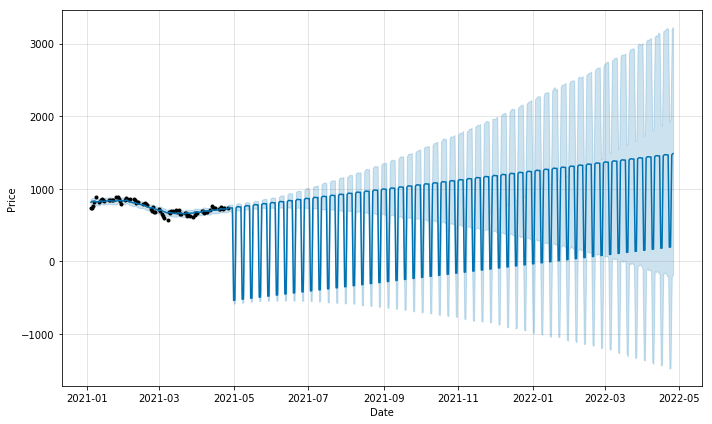

In [9]:
graph = model.plot(forcast, xlabel='Date', ylabel='Price')